# Importing modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
from ZEST import EDA
import pandas as pd

# Reading Datasets and Initializing EDA class

The datasets are downloaded and unzipped from this link given in the question prompt - [click](https://www.kaggle.com/wordsforthewise/lending-club)

Store the datasets in a `Data` directory, to load them in this notebook for EDA.

In [2]:
accepted = pd.read_csv("Data/accepted.csv")
rejected = pd.read_csv("Data/rejected.csv")

Initializing a EDA object called `eda` in this case. We will use this object to call all the methods we need for this analysis.

In [3]:
eda = EDA(accepted=accepted, rejected=rejected)

# Part 1 - Who gets a loan?

This analysis is broken down into 2 main parts
- **Part 1: Who gets a loan?**
- **Part 2: Who defaults on their loans?**

In Part 1, we compare several attributes of approved and rejected loan applications and try and get a sense of what kind of loan application has better chances of approval.

## Question 1 - Amount requested by approved and rejected applicants?

In this first question, we are trying to compare the loan amounts that was requested by the approved and rejected applicants, and see how it affected their chances of loan approval.

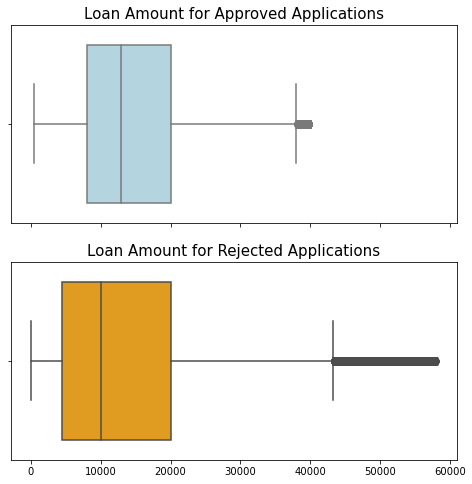

In [4]:
eda.loanAmountRequested()

Clearly, we can see that the candidates who were **denied loans**, requested for either **too low of an amount**, or **too high**. This can be confirmed with the extensive outliers in the rejected applications, and also given that the median of the rejected distribution is much lower than that of the accepted distribution.

## Question 2 - Debt-To-Income Ratio among Approved and Rejected Candidates?

In this question, we are trying to compare the Debt-to-Income ratio of applicants whose loans are approved and that of applicants who are denied loans.

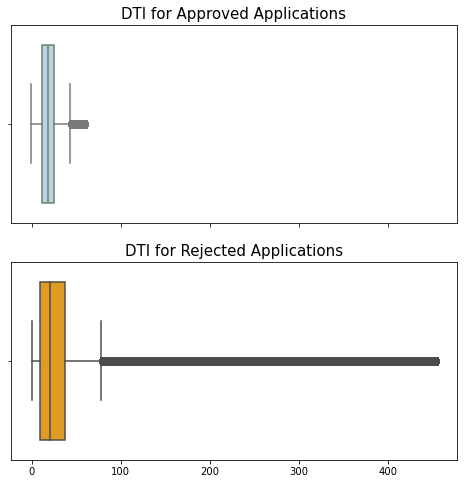

In [5]:
eda.dtiApplicants()

Clearly we can see that **rejected applicants** had **very high DTI ratios** as compared to the ones who got their loans approved. It also makes sense intuitively, as the lending company would be skeptical of lending money to applicants who already had massive debts.

## Question 3 - Geographic Location of Rejected vs Approved Applicants?

In this question, we are trying to find the states and zip codes from which applicants have a history of being approved more (and vice versa). 

In [6]:
eda.locationApplicants()

STATES
Highest Accept-to-Reject ratio
['NH', 'WY', 'VT', 'CA', 'NJ', 'NV', 'DC', 'CO', 'CT', 'MN']
--------------------------------------------------------------------------------
Lowest Accept-to-Reject ratio
['IA', 'MS', 'ID', 'AL', 'AR', 'SC', 'LA', 'TN', 'KY', 'ME']
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
ZIP CODES
Highest Accept-to-Reject ratio
['842xx', '848xx', '866xx', '867xx', '868xx', '869xx', '876xx', '886xx', '887xx', '899xx']
--------------------------------------------------------------------------------
Lowest Accept-to-Reject ratio
['009xx', '202xx', '733xx', '515xx', '524xx', '520xx', '507xx', '511xx', '501xx', '007xx']


The above summary shows that applicants from states like New Hampshire, California, etc have better odds of having their loans approved than applicants from states like Iowa.

Similarly for the zip codes, we can see that applicants from certain zip codes are more likely to get loans than applicants from other zip codes (mentioned in the lists above).

## Question 4 - Work Experience of Approved vs Rejected Applicants?

In this quesiton we are trying to guage how does the working experience of applicants determine the approval or denial rates.

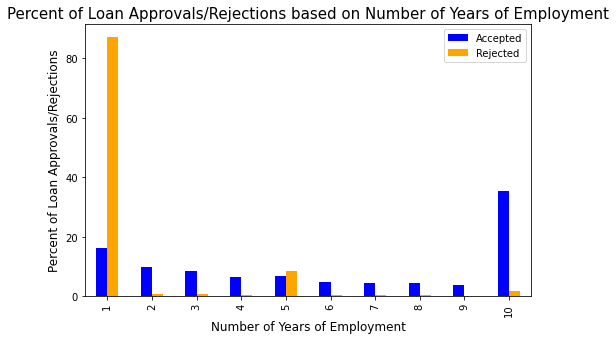

In [7]:
eda.experienceOfApplicants()

There is a very clear trend that applicants with **minimal experience** are **not granted loans** easily. We can also see a slight increase in rejections for very highly experienced candidates (10+ years of experience). However, the data is clipped at 10 years of experience, and this group actually can also contain applicants that are on the verge of retirement or even retired. This would explain the slightly higher rejection rates in that group.

## Question 5 - Language used in Loan Titles for Approved vs Rejected applications?

In this question we are trying to analyse the language people used when adding a title to their loan applications. The goal is to try and find words in the titles that may be red flags, and may cause the applications to be rejected.

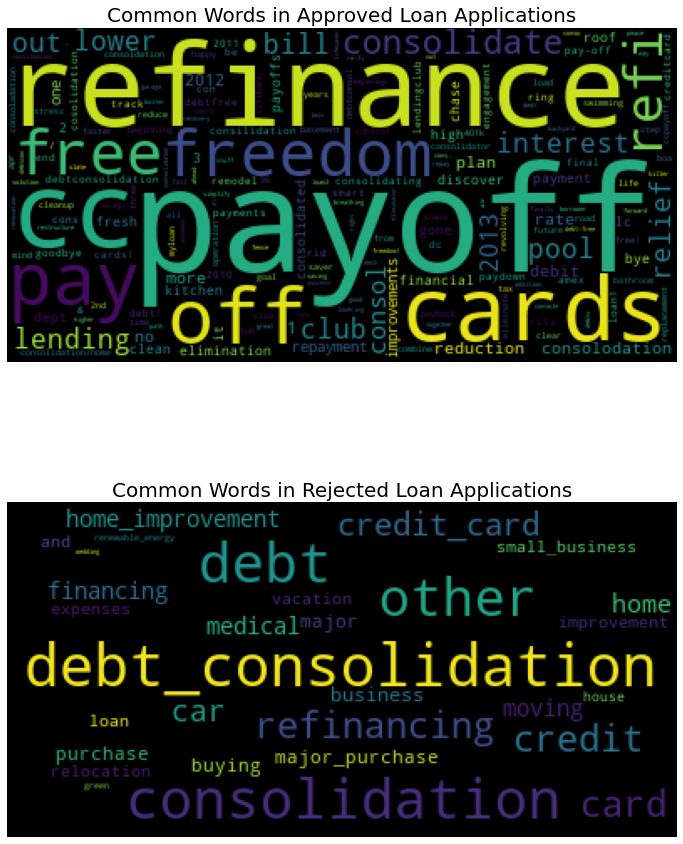

In [8]:
eda.loanTitleWordClouds()

Most of the words used in the titles of both accepted and rejected applications are similar. However, the rejected applications had some distinct red flag words like - **debt, major_purchase, medical**, etc. which was not there in the approved applications. This gives us a better understanding of the reasons for which some applicants take out loans, and why some of these reasons could be concerning.

# Part 2 - Who defaults on their loans?

In this part, we compare several attributes of the approved loans, and try and understand what characteristics might lead to a applicant defaulting on their loans.

## Question 6 - Do people default more on long and high interest loans?

In this question we try and analyse the Interest rate and the term of the loans to see if there is a correlation with the number of defaults.

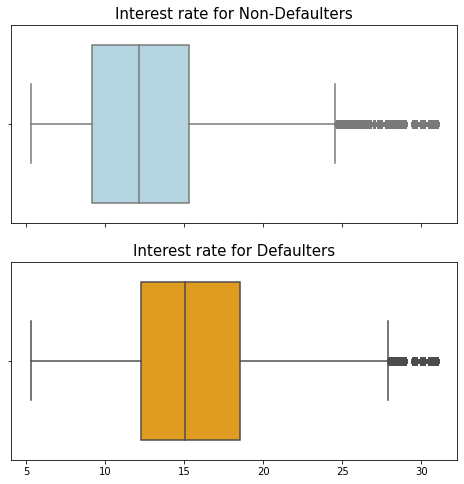

In [9]:
eda.defaultsInterestRate()

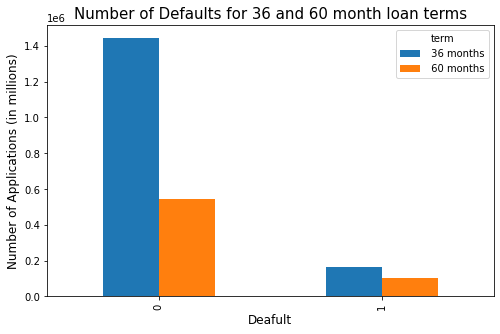

In [10]:
eda.defaultsTerm()

Clearly we can see that **defaulted loans had a significantly higher interest rate** than the paid off loans.

In addition to this, for long term loans (60 months/10 years), the **proportion of defaults** are **higher**, which might imply that **long term and high interest loans are riskier**.

## Question 7 - What is the grade of the commonly defaulted loans?

This question analysis the grade assigned to the loans and how that might affect the default rates.

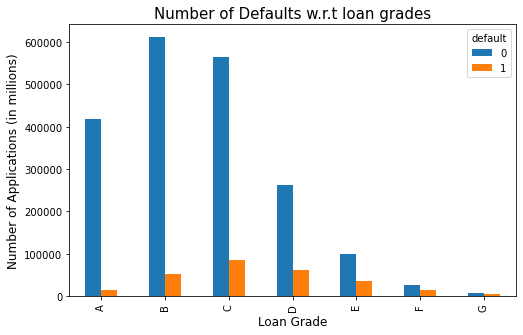

In [11]:
eda.defaultsLoanGrade()

The plot shows that the **proportion of defaults** with respect to the non-defaulted loans **increase** in grades **E, F and G**.

## Question 8 - What are the number of credit inquiries made about the applicant recently?

The number of times a person's credit history is pulled is often times a red flag, so this question tried to analyse the number of credit inquiries, and its effects on defaults.

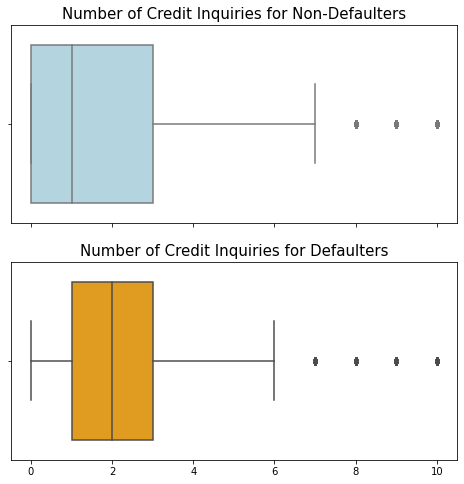

In [12]:
eda.defaultsCreditInq()

As expected, the number of **credit inquiries** are **higher** in cases of **defaulter**.

## Question 9 - What is the financial 'trust' in the applicant?

The upper and lower bounds on the FICO score, and the credit limit are 2 measures by which institutions try and judge how much are they willing to *trust* a candidate. This question tries to analyse these estimates for defaulters and non-defaulters.

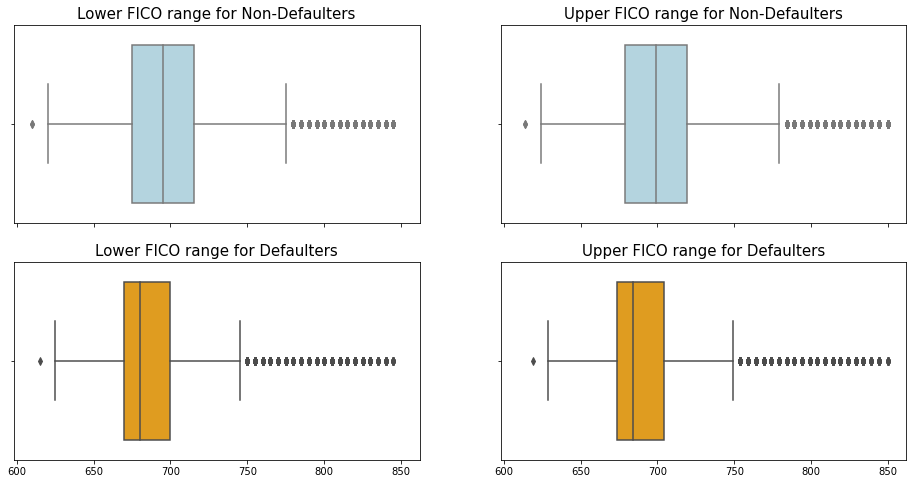

In [13]:
eda.defaultsFicoRange()

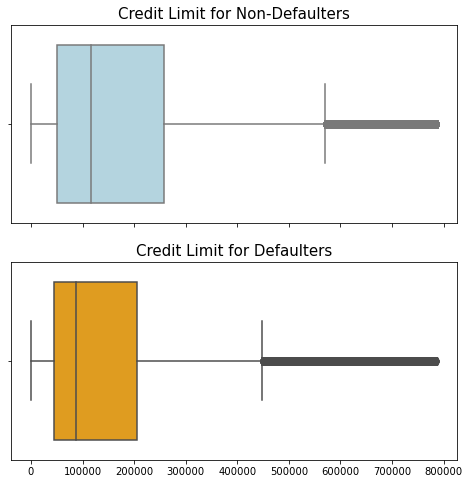

In [14]:
eda.defaultsCreditLimit()

As expected, the **upper and lower FICO bounds**, and the **credit limit** for **defaulters** is in expectation **lower** than that of the non-defaulters.

## Question 10 - What was the purpose of defaulted loans?

In this question we try and analyse the purpose of loans, and how it effects the default rates.

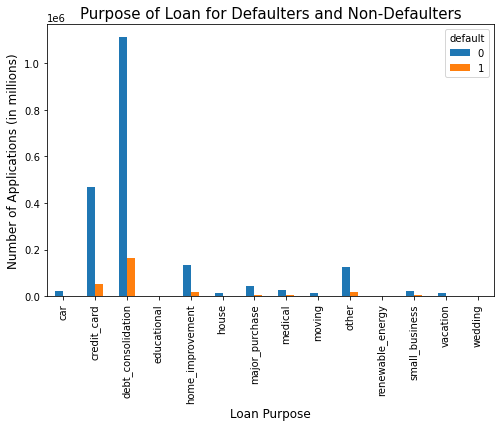

In [15]:
eda.defaultsLoanPurpose()

Clearly, **consolidating debts**, **clearing credit card bills** and **home improvements** are **riskier** loan purposes as they are associated with **more defaults**. 

# Conclusions

From the analysis we can conclude that applicants have a **better chance of loan approval** if they - 
- Request moderate loan amounts (not too low, not too massive).
- Have lower DTI ratio.
- Reside in the states and zip codes listed in question 3.
- Are more experienced, or have more number of years in employment.
- Avoid taking out loans for medical, home improvement, or for clearing past debts.

In addition to this, out of the accepted candidate, the ones that are at a **greater risk of default** are the ones who - 
- Are offered high interest and long term loans.
- Are offered loans of grade E, F, and G.
- Have greater number of credit history inquiries against their name.
- Have lower FICO and Credit Limits
- Take out loans for consolidating debts, clearing credit card bills and for home improvements.